## How Loan Ratings and Score affect loan applications and their outcome

### Overview
For this project, i focused on the relationship between loan ratings ang other variables of interest.
I investigated how ratings affected loans and the influence they had on the outcome of loans(e.g defaulted or completed loans)

### Dataset
This dataset is a financial dataset that contains informations related to the loan, borrowers, lenders, interest rates for Prosper Marketplace.  Prosper Marketplace Inc. is a San Francisco, California company that specializes in loans at low interest rates to the borrowers. The dataset contains various information about loan applicants and about their loan applications. The data consists of information regarding 11393 loans. Each loan has 81 
variables(data on each loan). I selected 14 variables for investigation. Some of the selecetd variables include borrowers rate, lenders yield, investors, income range, prosper score among others.

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [13]:
#Load in the data
loan_data = pd.read_csv("prosperLoanData.csv")

In [14]:
ordinal_var_dict = {'ProsperRating (Alpha)': ['AA','A', 'B', 'C', 'D', 'E', 'HR'],
                    'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999',
                                     '$0', 'Not employed','Not displayed']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_data[var] = loan_data[var].astype(ordered_var)

### Why do people take loans?

Researches have shown that the most popular reason why people take loans is to pay back previous loans. The visuals above coincides with this theory. Most reasons why the loan was collected was debt consolidation. second highest reason was unavailable and third was other reasons. This also shows that most loan collectors where not comfortable disclosing their reasons for taking loans.  Among other viable reasons, we see that people mostly take loans for home improvement and business. 

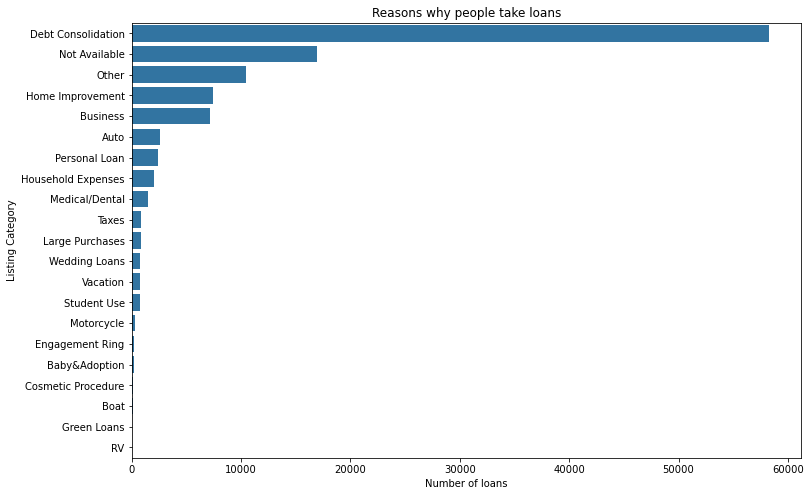

In [15]:
listing_map = {0: "Not Available",1: "Debt Consolidation", 2 : "Home Improvement", 3: "Business", 4: "Personal Loan",
          5 : "Student Use", 6 : "Auto", 7 : "Other", 8 : "Baby&Adoption", 9: "Boat", 10 : "Cosmetic Procedure",
          11 : "Engagement Ring", 12 : "Green Loans", 13 : "Household Expenses", 14 : "Large Purchases", 
          15 : "Medical/Dental", 16: "Motorcycle", 17 : "RV", 18 : "Taxes", 19 : "Vacation", 20: "Wedding Loans"}

loan_data["Listing Category"] = loan_data["ListingCategory (numeric)"].map(listing_map)

order = loan_data[ "Listing Category"].value_counts().index
base_color = sb.color_palette()[0]
plt.figure(figsize=[12, 8]);
sb.countplot(data = loan_data, y = "Listing Category", order = order, color =  base_color);
plt.title("Reasons why people take loans");
plt.ylabel("Listing Category");
plt.xlabel("Number of loans");


### Does better ratings influence borrowers rate?

It appears that there is a negative relationship between borrowers rate and the prosper rating. We see a rise in average borrowers rate as the ratings move from best to worst. This implies that people with AA ratings get loans at the best rates. We observe lots of outliers on all the different categories of ratings. These outliers might point to the fact that ratings alone do not influence the borrowers rate. As expected, we also see a negative relationship between borrowers rate and prosper score.

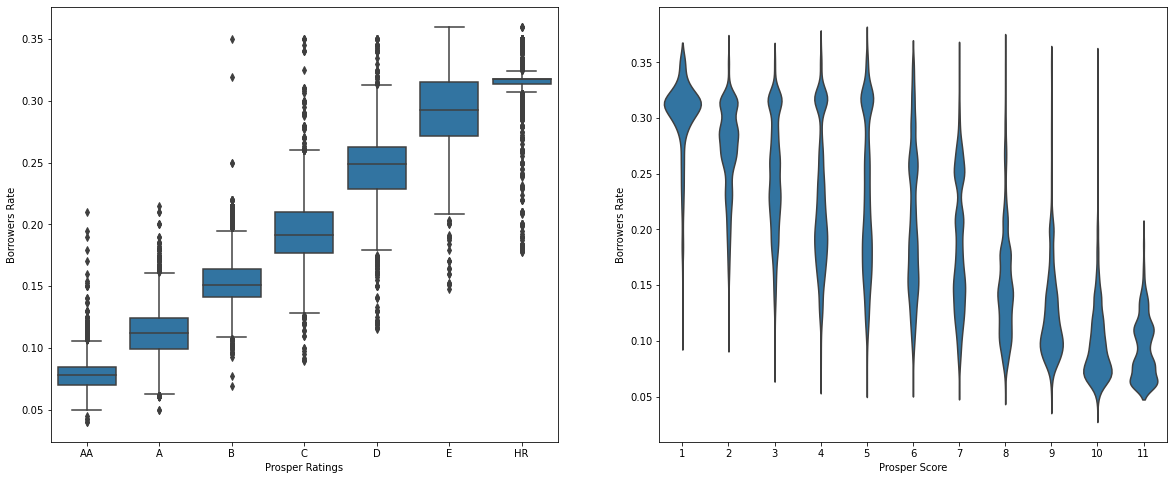

In [16]:
## Box plot for Borrowers Rate of different ratings
plt.figure(figsize = [20, 8])


plt.subplot(1,2,1)
base_color = sb.color_palette()[0];
sb.boxplot(data=loan_data, x="ProsperRating (Alpha)", y='BorrowerRate', color = base_color);
plt.ylabel("Borrowers Rate");
plt.xlabel("Prosper Ratings");


plt.subplot(1,2,2)
base_color = sb.color_palette()[0];
sb.violinplot(data=loan_data, x="ProsperScore", y='BorrowerRate', color = base_color, inner = None);
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],["1","2","3","4","5","6","7","8","9","10","11"]);
plt.ylabel("Borrowers Rate");
plt.xlabel("Prosper Score");


In [17]:
#Lump all categories that indicate loan payment default at different degrees together
loan_cat_index = loan_data["LoanStatus"].value_counts().index
top2 = loan_cat_index[:2]
top2.tolist()
loan_data['NewLoanStatus'] = loan_data["LoanStatus"].apply(lambda x: x if x in top2 else "Delinquent/ChargedOff")


### How does risk score influence/affect the tendency to default on loan payment?
The shape of the delinquent/chargedoff category shows higher probability of loan applicants having their score rating between 4 and 7 with the median around 5 while the shape of the completed category shows high probability around higher ratings between 7 and 10.

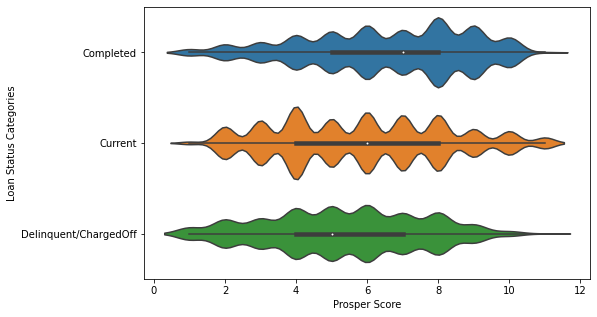

In [18]:
plt.figure(figsize=[8, 5])
sb.violinplot(data = loan_data, y = 'NewLoanStatus', x = "ProsperScore")
plt.xticks(rotation = 0);
plt.xlabel("Prosper Score");
plt.ylabel("Loan Status Categories");

### How does prosper ratings influence/affect the tendency to default on loan payment?

Comparing the Delinquent/ChargedOff category for all ratings from best to worst, we find something very interesting. We notice a constant increase in percentage of loan applicants who defaulted on their loans. 

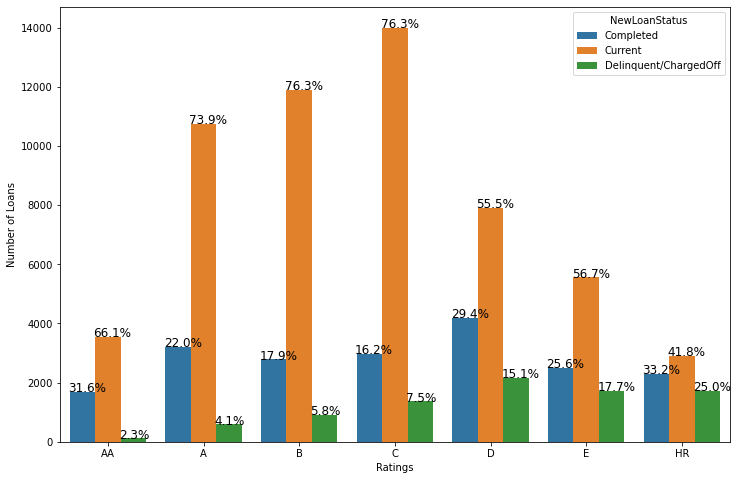

In [19]:
# with_hue function will plot percentages on the bar graphs 
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts(sort = False).values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), size = 12)
            
plt.figure(figsize=[12, 8])
ax = sb.countplot(data = loan_data, hue = 'NewLoanStatus', x = "ProsperRating (Alpha)")
plt.xticks(rotation = 0);
plt.xlabel("Ratings");
plt.ylabel("Number of Loans")

with_hue(ax, loan_data["ProsperRating (Alpha)"], 7, 3)

### Are investors giving preference to loan applicants with better ratings?
A constant drop in the average number of investors as we move from loan applications with the best ratings to the worst shows that investors are more likely to invest in loan applications with higher ratings.

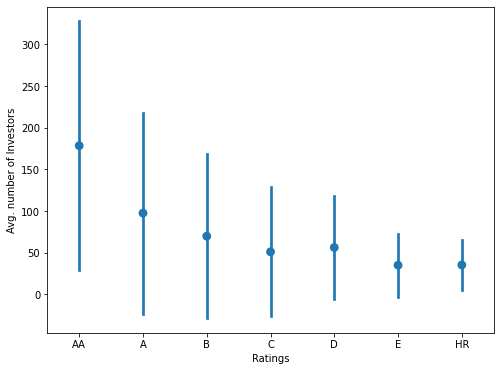

In [20]:
plt.figure(figsize=(8,6))
sb.pointplot(data=loan_data, x='ProsperRating (Alpha)', y='Investors', color=base_color, ci='sd', linestyles="");
plt.ylabel('Avg. number of Investors');
plt.xlabel("Ratings");

### Principal Net Loss across different ratings and income ranges

We observe that loan applicants with no income contributed extremely to the loss in most ratings categories. This is also supported by the notable spikes(standard deviation) on the bars signifying no income.

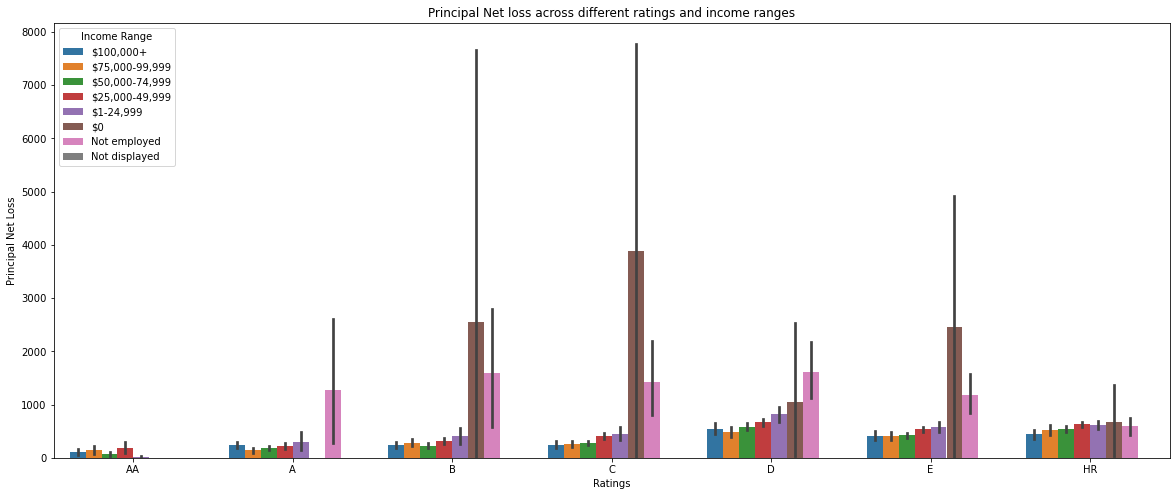

In [21]:
plt.figure(figsize=(20,8))
sb.barplot(data=loan_data,  y = 'LP_NetPrincipalLoss', x = "ProsperRating (Alpha)", hue = "IncomeRange")
plt.legend(title="Income Range", loc = "upper left");
plt.ylabel('Principal Net Loss');
plt.xlabel("Ratings");
plt.title("Principal Net loss across different ratings and income ranges");

In [ ]:
!jupyter nbconvert Part_2_Explanatory.ipynb --to slides --post serve --no-input --no-prompt